In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TopFarm2
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

print("Imports OK ")

Imports OK 


## Sprawdzenie: Imports OK ✓

### Co się stało?
Pomyślnie zaimportowaliśmy wszystkie potrzebne biblioteki do optymalizacji farmy wiatrowej.

### Co oznacza "Imports OK"?
- ✓ NumPy i Matplotlib działają
- ✓ TopFarm2 jest zainstalowany i dostępny
- ✓ Możemy teraz definiować problemy optymalizacyjne

### Co zaimportowaliśmy?

| Biblioteka | Do czego? |
|---|---|
| **TopFarmProblem** | Główna klasa do definiowania problemu optymalizacji farmy |
| **XYBoundaryConstraint** | Ograniczenie: turbiny muszą być w prostokątnej granicy |
| **CircleBoundaryConstraint** | Ograniczenie: turbiny muszą być w kołowej granicy |
| **SpacingConstraint** | Ograniczenie: minimalna odległość między turbinami |
| **CostModelComponent** | Model kosztów/produkcji farmy |
| **XYPlotComp** | Wizualizacja wyników optymalizacji |

### Z perspektywy praktyki (projektowanie farmy)
Te narzędzia pozwalają nam:
1. Zdefiniować problem optymalizacji (gdzie mogą być turbiny, jakie są ograniczenia)
2. Uruchomić algorytm optymalizacji (znaleźć najlepszy układ)
3. Zwizualizować wyniki (zobaczyć gdzie powinna być każda turbina)


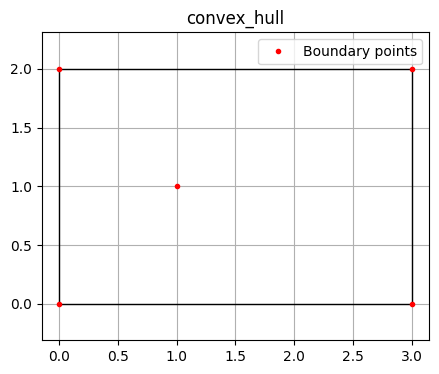

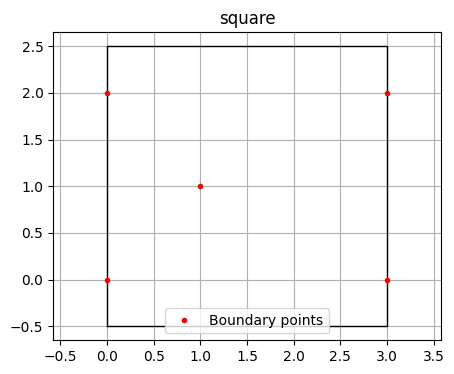

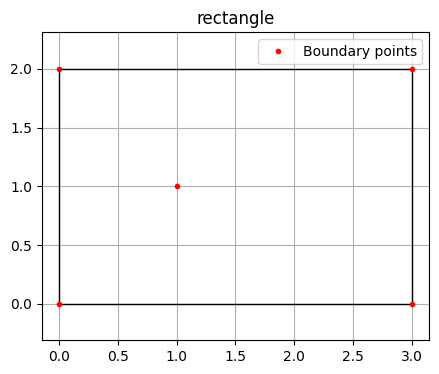

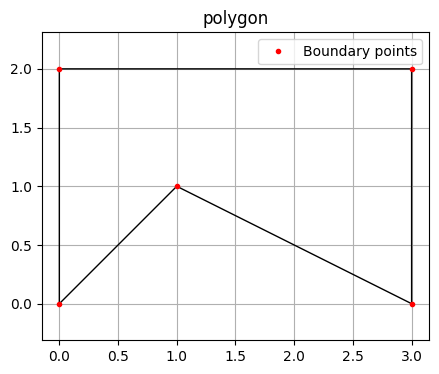

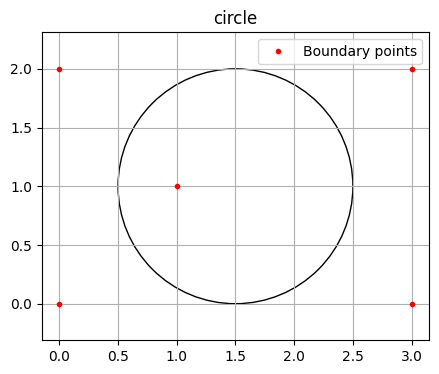

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TopFarm2
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

# 1) Punkty granicy (współrzędne w "umownych" jednostkach)
boundary = np.array([(0, 0), (1, 1), (3, 0), (3, 2), (0, 2)])

# 2) “Sztuczne” turbiny (tylko do rysowania)
x = [0.5, 1.5]
y = [0.5, 1.5]

# 3) Dummy koszt: nie optymalizujemy jeszcze AEP, tylko potrzebujemy obiektu problemu
dummy_cost = CostModelComponent(
    input_keys=[],
    n_wt=2,
    cost_function=lambda: 1
)

def plot_boundary(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x': x, 'y': y},
        cost_comp=dummy_cost,
        constraints=[constraint_comp],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(5, 4))
    plt.title(name)
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:, 0], boundary[:, 1], '.r', label='Boundary points')
    plt.axis("equal")
    plt.grid(True)
    plt.legend()

# 4) Różne typy granicy (to jest “wow” wizualizacji)
plot_boundary('convex_hull', XYBoundaryConstraint(boundary, 'convex_hull'))
plot_boundary('square',      XYBoundaryConstraint(boundary, 'square'))
plot_boundary('rectangle',   XYBoundaryConstraint(boundary, 'rectangle'))
plot_boundary('polygon',     XYBoundaryConstraint(boundary, 'polygon'))
plot_boundary('circle',      CircleBoundaryConstraint((1.5, 1), 1))

## Krok 1: Boundary Constraints – Różne typy granic ✓

### Co narysowaliśmy?
Pięć różnych typów ograniczeń granicznych dla farmy wiatrowej:

| Typ granicy | Co to? | Wizualnie | Kiedy używać? |
|---|---|---|---|
| **convex_hull** | Wypukła otoczka punktów | Wypukły wielokąt otaczający wszystkie punkty | Gdy nie wiemy jaką formę powinna mieć farma |
| **square** | Najmniejszy możliwy kwadrat | Kwadrat zawierający wszystkie punkty | Farma o symetrycznych wymiarach |
| **rectangle** | Najmniejszy możliwy prostokąt | Prostokąt zawierający wszystkie punkty | Farma na prostokątnym terenie |
| **polygon** | Dokładny wielokąt | Wielokąt przechodzący przez zdefiniowane punkty | Farma na nieregularnym terenie (np. wokół rzeki) |
| **circle** | Koło o określonym środku i promieniu | Okrąg | Farma na terenie o kształcie kołowym |

### Z perspektywy praktyki (projektowanie farmy)

1. **convex_hull** – Gdy dostajemy graniczne punkty terenu i chcemy znaleźć najmniejszy możliwy obszar
2. **rectangle** – Najczęściej stosowana w praktyce (łatwe do zdefiniowania: długość × szerokość)
3. **polygon** – Gdy farma ma nieregularny kształt (unika się zabudowań, rzek, lasów)
4. **circle** – Rzadziej, ale przydatne do testów i symulacji
5. **square** – Jako baseline do porównań

### Wniosek
**TopFarm2 pozwala nam zdefiniować różne typy granic**, a algorytm optymalizacji będzie szukać najlepszego rozmieszczenia turbin **zawsze wewnątrz wybranego ograniczenia**.


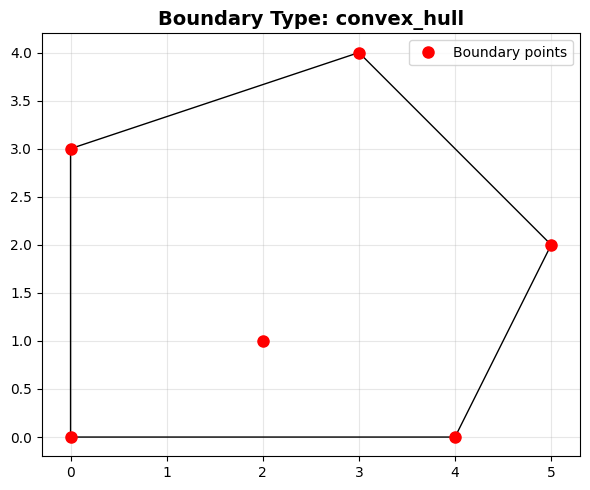

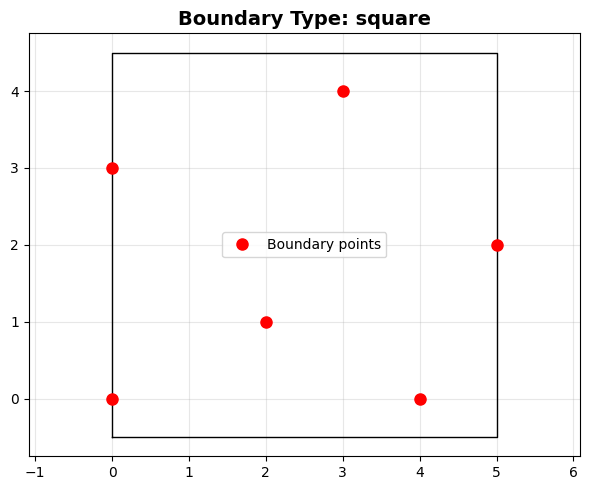

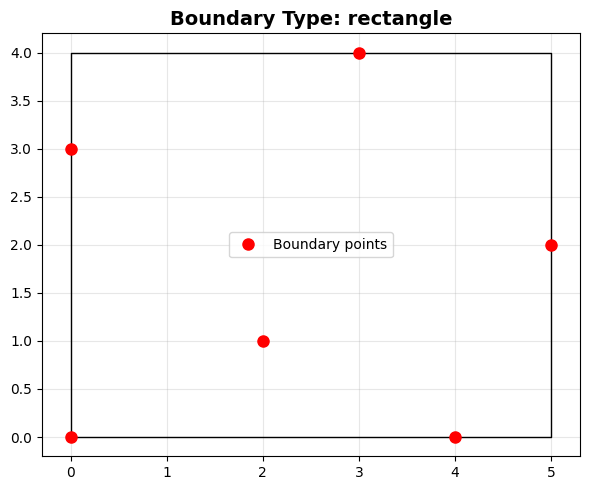

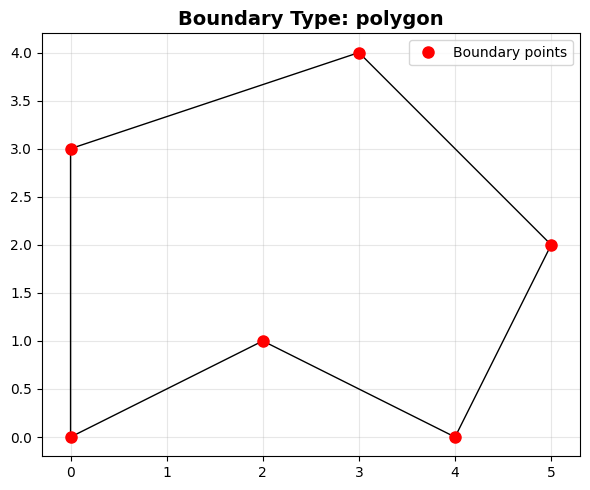

✓ Narysowaliśmy 4 typy boundary constraints!


In [3]:
# Krok 1b: Własny Boundary – "Projekt obszaru farmy"

# Definiujemy 6 punktów boundary (kształt przypominający "L")
boundary = np.array([
    (0, 0),
    (2, 1),
    (4, 0),
    (5, 2),
    (3, 4),
    (0, 3)
])

# Początkowe pozycje turbozin (dummy)
x = [1.5, 2.5, 3.5]
y = [1.5, 2.5, 1.5]

# Rysujemy 4 typy boundary w pętli
for boundary_type in ['convex_hull', 'square', 'rectangle', 'polygon']:
    tf = TopFarmProblem(
        design_vars={'x': x, 'y': y},
        cost_comp=dummy_cost,
        constraints=[XYBoundaryConstraint(boundary, boundary_type)],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(6, 5))
    plt.title(f"Boundary Type: {boundary_type}", fontsize=14, fontweight='bold')
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:, 0], boundary[:, 1], 'ro', markersize=8, label='Boundary points')
    plt.axis("equal")
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

print("✓ Narysowaliśmy 4 typy boundary constraints!")

## Krok 1b: Custom Boundary – Projektowanie obszaru farmy ✓

### Jaką granicę zaprojektowaliśmy?
Zdefiniowaliśmy 6 punktów granicznych tworących kształt przypominający **"L"** (nieregularny teren):
- Punkty: (0,0) → (2,1) → (4,0) → (5,2) → (3,4) → (0,3)
- Reprezentuje: teren farmy unikający zabudowań, rzek lub innych przeszkód

### Czym różni się convex_hull od polygon?

| Aspekt | Convex_hull | Polygon |
|---|---|---|
| **Kształt** | Wypukła otoczka (wypukły wielokąt) | Dokładny kształt zdefiniowanych punktów |
| **Wizualnie** | Gładkie linie, wszystkie punkty wewnątrz | Przebiega przez wszystkie zdefiniowane punkty |
| **Область dostępna** | WIĘKSZA (więcej przestrzeni) | MNIEJSZA (dokładnie według punktów) |
| **Liczba turbin** | Więcej turbozin się zmieści | Mniej turbozin ze względu na wklęsłości |
| **Praktyka** | Gdy chcemy maksymalizować dostępny teren | Gdy musimy dokładnie śledzić granice terenu |

### Praktyczne znaczenie (budowa farmy)

**Convex_hull** – dla inwestora = więcej turbin możliwe
- Przykład: jeśli teren ma "wklęsłość" (np. jezioro pośrodku), convex_hull to zignoruję
- Ryzyko: turbiny mogłyby być wewnątrz jeziora! ❌

**Polygon** – bezpieczniejsze dla inżyniera
- Dokładnie śledzę granice terenu
- Unikam zabudowań, rzek, lasów
- Gwarantuję, że turbiny będą na bezpiecznym terenie ✓

### Wniosek
W praktyce **używamy polygon** gdy znamy dokładne granice terenu, a **convex_hull** gdy chcemy oszacować maksymalny potencjał terenu.
